<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL Avançado
Caderno de **Exercícios**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Subqueries;</li>
  <li>Agregações por particionamento</li>
  <li>Visões;</li>
</ol>

---

# **Instruções**

Neste exercícios, vamos configurar e testar os serviços AWS S3 e AWS Athena da plataforma de computação em nuvem da AWS para utilizarmos durante todo o curso: 

Na etapa de **configuração**, você deve seguir o passo a passo de configuração do ambiente, não há entregáveis.

Na etapa de **atividades**, você deve:

 1. Eexecutar a consulta SQL fornecida;
 2. Exportar os resultados em um arquivo csv para sua máquina; 
 3. Renomear o arquivo como **query_\<numero-da-query>.csv**;
 4. Enviar para a avaliação do tutor na plataforma da EBAC.

> **Atenção**: Substitua o **\<numero-da-query>** numero da consulta, exemplo: **query1.csv**.



---

# **Configuração**

## 1\. Configurando o AWS S3

1. Acesse AWS S3;
2. Crie um novo bucket:
 *   **modulo7-<seu-nome\>-ebac** 
3. Crie duas pastas dentro do bucket **modulo7-<seu-nome\>-ebac**:
 *   **cliente**
 * **transacoes**
4. Na pasta modulo7-<seu-nome\>-ebac/cliente, carregue o arquivo **cliente.csv**
5. Na pasta modulo7-<seu-nome\>-ebac/transacoes, carregue o arquivo **transacoes.csv**

> **Atenção**: Caso o bucket já exista, sinta-se a vontade para escolher o nome que desejar.

 > **Atenção**: Os arquivo **cliente.csv** e **transacoes.csv** está na plataforma da EBAC.

 >**Observação:** não é a mesma tabela de clientes do modulo 6. As lojas foram alteradas para melhorar os exemplos. 

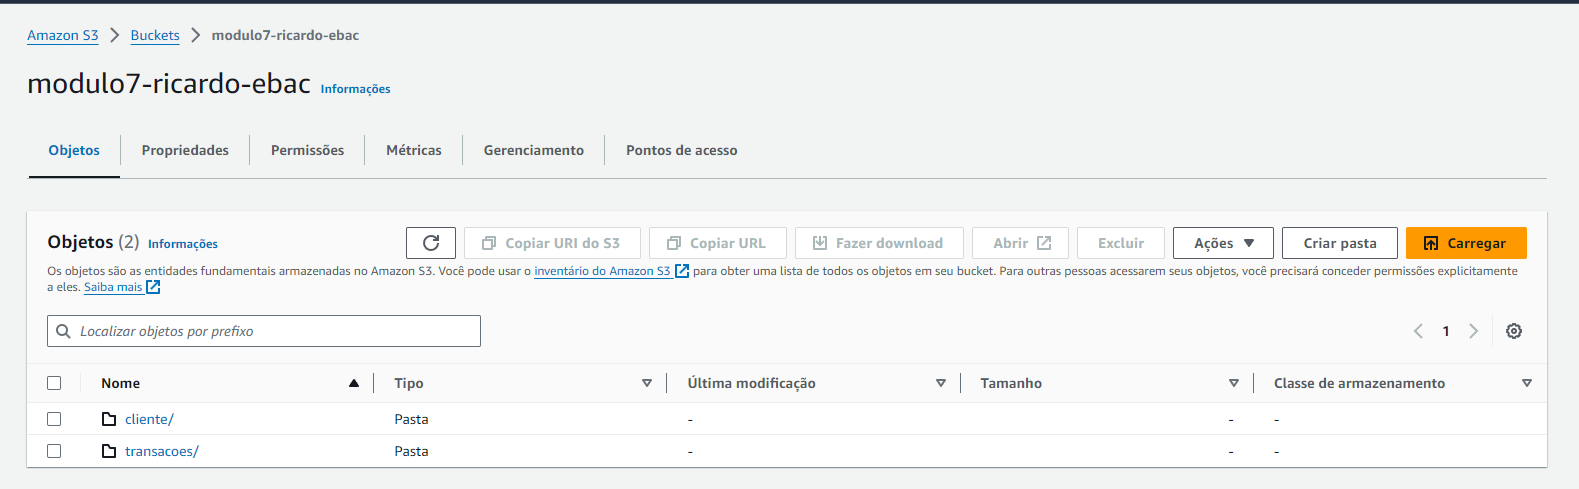

# Atividades

# **1. Criação da tabela** 

No console do AWS Athena, execute a seguinte query:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.cliente (
  `id_cliente` int,
  `nome` string, 
  `valor_compra` double,
  `loja_cadastro` string 
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://modulo7-mari-ebac/cliente/'
TBLPROPERTIES ('has_encrypted_data'='false');
```
e

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.transacoes (
  `id_cliente` int,
  `id_transacao` bigint,
  `valor_compra` double,
  `id_loja` string 
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://modulo7-mari-ebac/transacoes/'
TBLPROPERTIES ('has_encrypted_data'='false');
```

Para cada uma das queries, no painel de resultados, você deve encontrar o seguinte resultado.

```
Query successful.
```


> **Atenção**: No campo LOCATION, substitua pelo caminho da sua pasta, exemplo: **modulo7-mari-ebac**.

> **Atenção**: Nesta atividade, você não precisa exportar os resultados.

Coloquei o 'm7' para diferenciar das tabelas ja existente


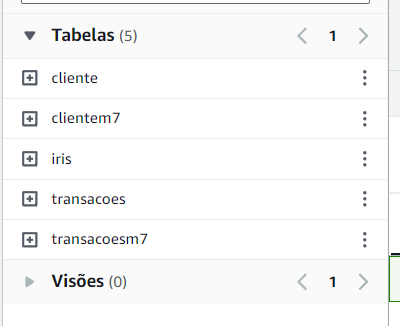

# **2. Subqueries** 

## 2.1. Query 1 

No console do AWS Athena, execute a seguinte query:

```sql
SELECT id_loja, id_cliente, id_transacao from transacoes 
WHERE id_loja IN
(SELECT cliente.loja_cadastro from cliente where cliente.valor_compra > 160 )
```

No painel de resultados você deve encontrar o seguinte resultado.

|id_loja|id_cliente|id_transacao
|-|-|-|
|magalu|1|768805383|
|postoshell|3|818770008|
|magalu|1|76856563|

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

Depois desse exercicios recriei as tabelas sem o 'm7' no final com muitas tabelas com os nomes 
parecidos acabava me confundindos elas.

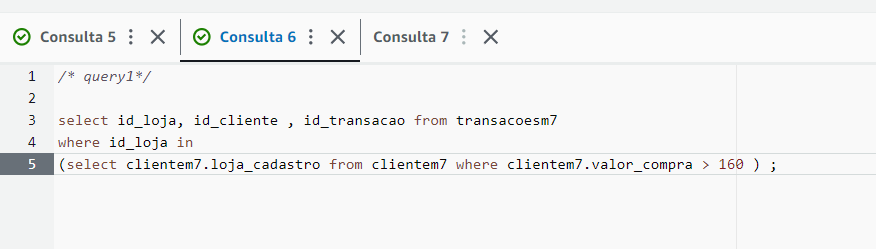

# **3.Particionamento**

**Configuração**




1. Acesse AWS S3;
2. Crie um novo bucket:
 *   **transacoes-partition-<seu-nome\>** 
3. Crie duas pastas dentro do bucket **transacoes-partition-\<seu-nome\>**:
* id_loja=magalu
* id_loja=giraffas
* id_loja=postoshell
* id_loja=subway
* id_loja=seveneleven
* id_loja=extra
* id_loja=shopee

3. Em cada uma das pastas, carregue o arquivo CSV relativo à loja. 

> **Atenção**: Caso o bucket já exista, sinta-se a vontade para escolher o nome que desejar.

 > **Atenção**: Os arquivo  **.csv** estão na plataforma da EBAC.

 

Crie a tabela particionada: 

```sql
CREATE EXTERNAL TABLE transacoes_part(
  id_cliente BIGINT, 
  id_transacoes BIGINT, 
  valor DOUBLE) 
  PARTITIONED BY (id_loja string)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) 
LOCATION 's3://transacoes-partition-mari/'
```

E carregue as partições:

```sql
MSCK REPAIR TABLE transacoes_part;
```

No console do AWS Athena, execute a seguinte query:

```sql
select count(*) from transacoes
```

e 
```sql
select count(*) from transacoes_part
```

> Não há necessidade de entrega nessa fase de configuração

### nessa parte ao invés de criar cada pasta e subir um por um dos arquivos eu subi  a  pasta com or aruivos ja organizados.

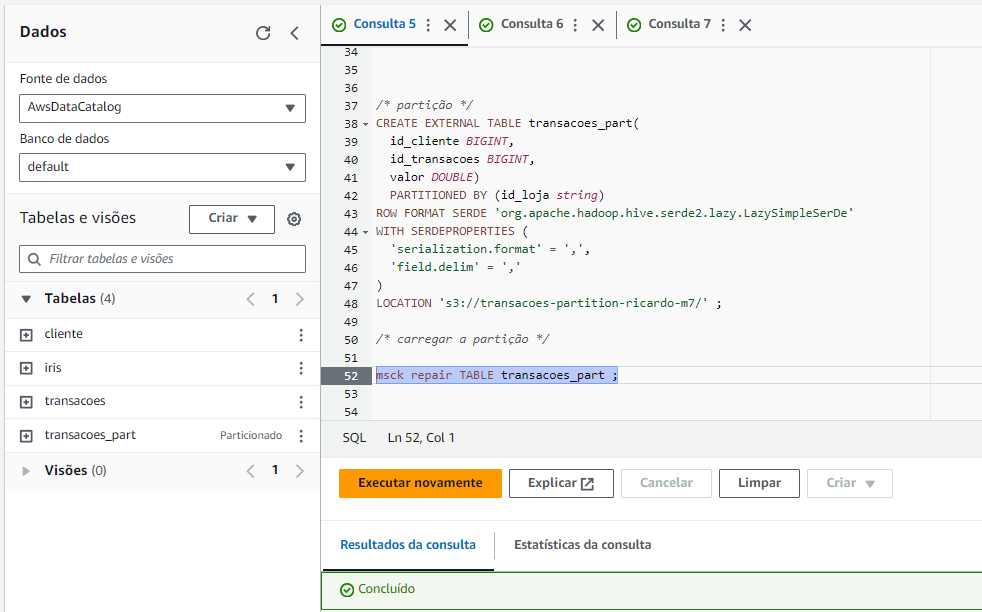

como subi com a opção pasta , na hora de criar a tabela a partição tinha que ser assim.

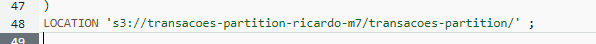

## 3.1 Query 2 

Execute a seguinte query:

```sql
SELECT * FROM transacoes_part where id_loja = 'magalu'
```

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

Não há necessidade de entrega, mas compare o tamanho do data scanned da seleção acima em relação com:

```sql
SELECT * FROM transacoes where id_loja = 'magalu'
```

resultado da tabela particionada.

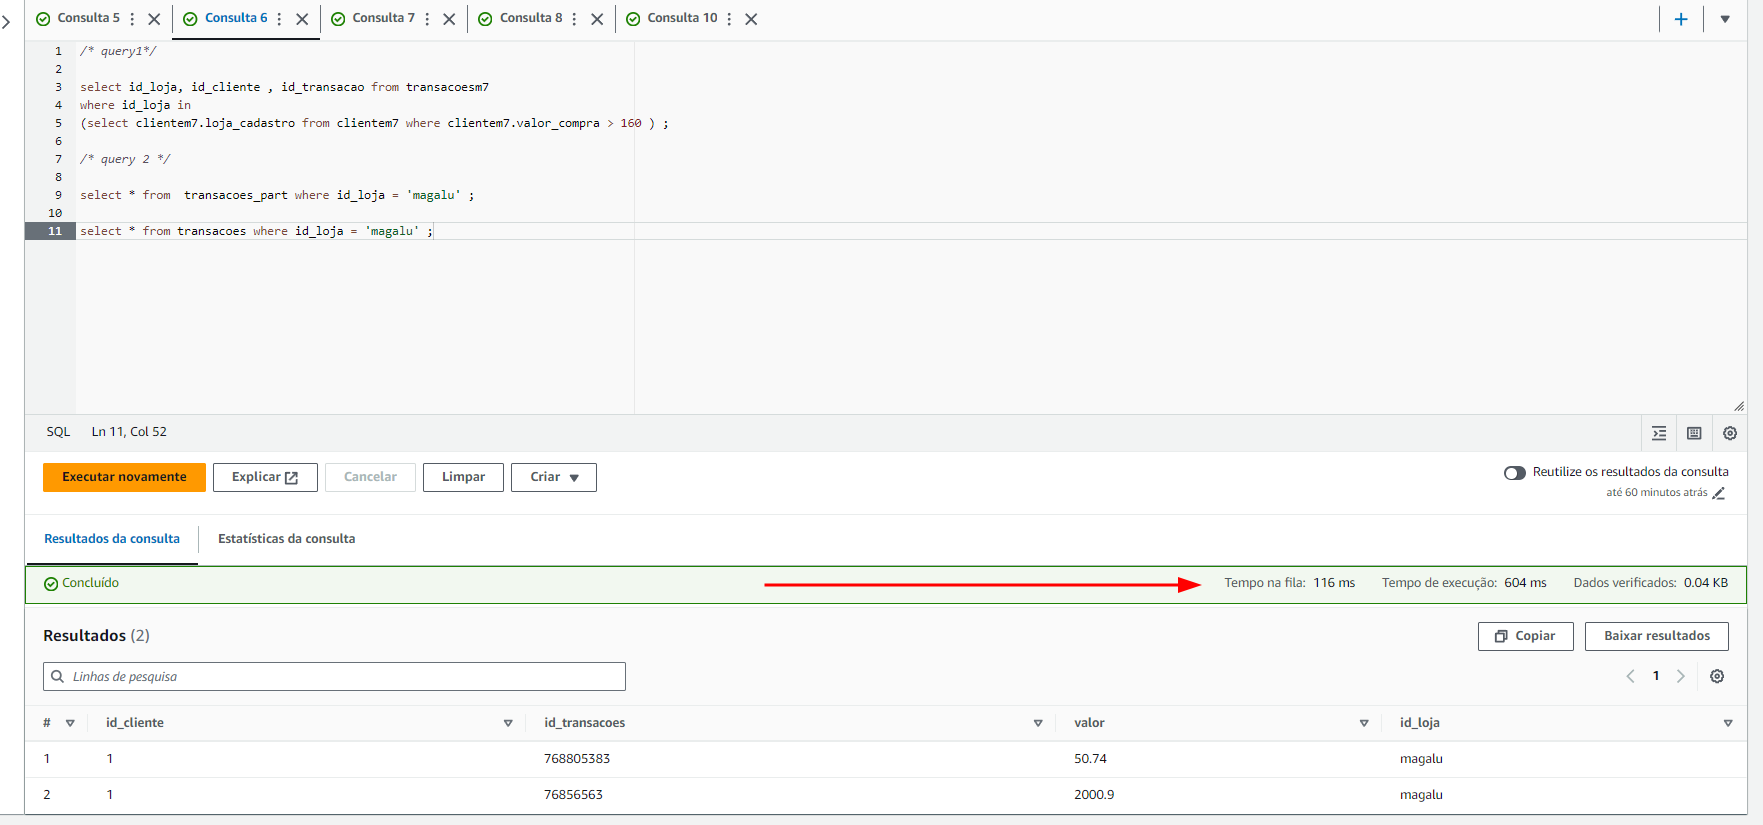



resultado não particionado.


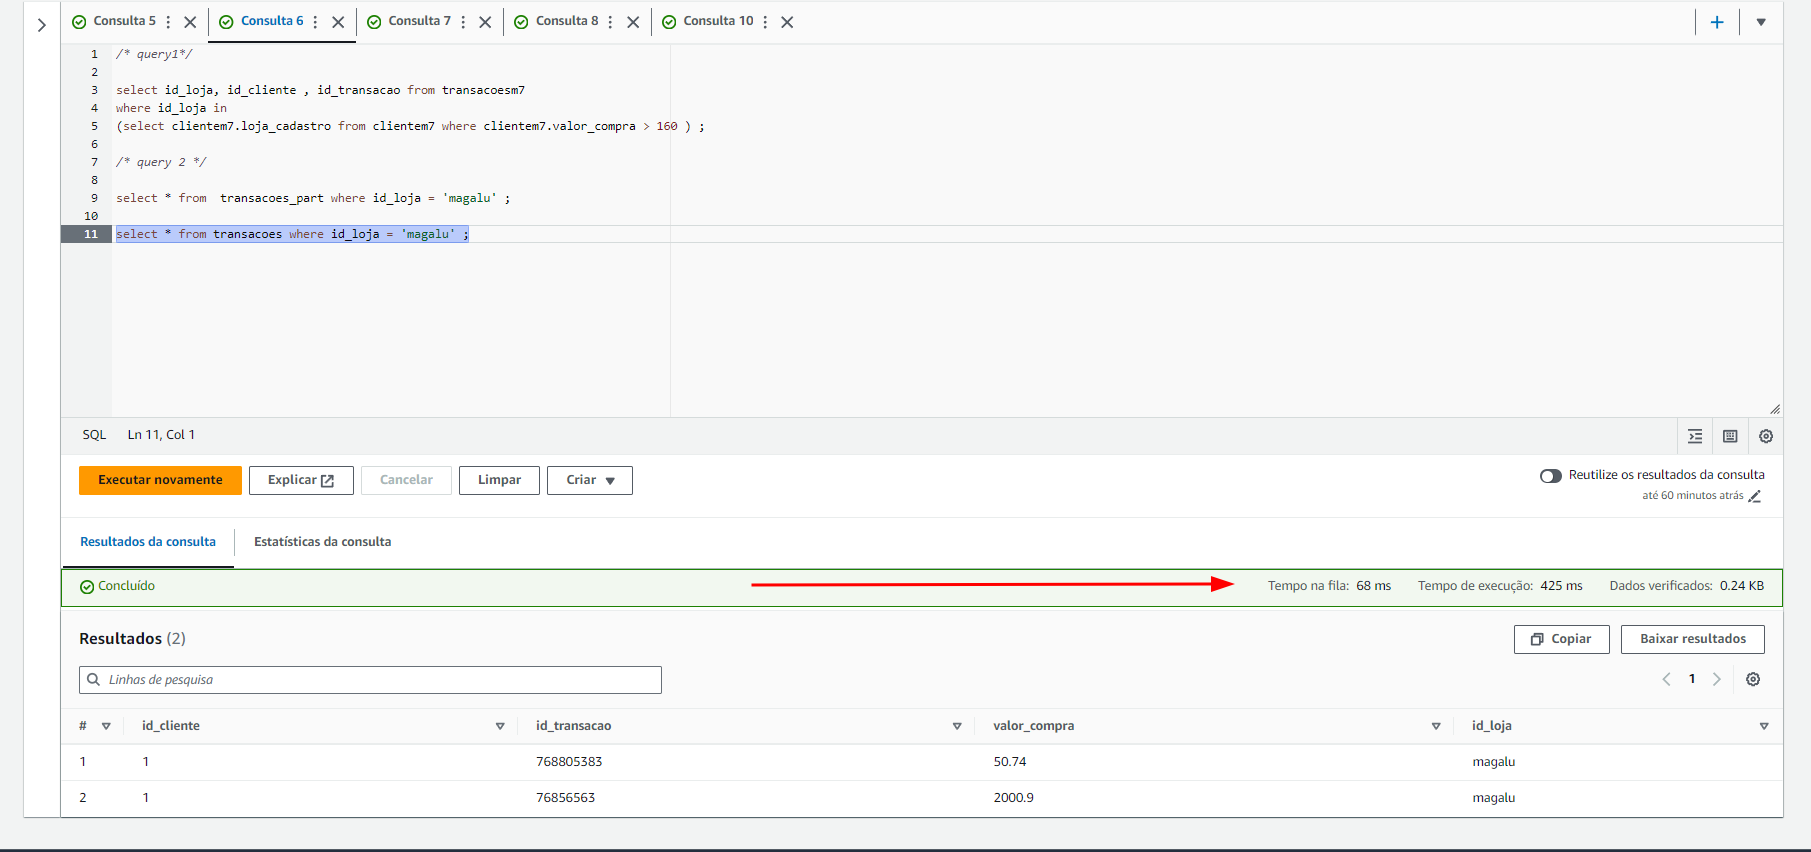

# **4. Visões**


## 4.1 Query 3

No console do AWS Athena, execute a seguinte query:

```sql
CREATE VIEW  transacoesv100 AS
SELECT id_cliente , valor_compra, id_loja AS nome_loja FROM transacoes where valor_compra > 100
```

Extrai os resultados da query a seguir para envio da atividade **query3**:

```sql
select * from transacoesv100
```



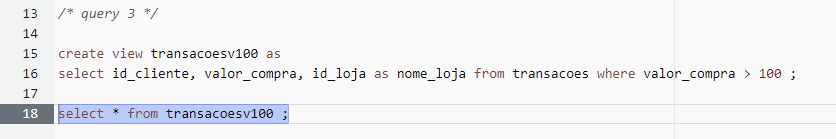

## 4.2 Query 4


No console do AWS Athena, execute a seguinte query:

```sql
CREATE VIEW clientevalor  AS 
SELECT id_cliente, valor_compra FROM transacoes ORDER BY valor_compra DESC LIMIT 2;
```

Extrai os resultados da query a seguir para envio da atividade **query4**:

```sql
select * from clientevalor
```



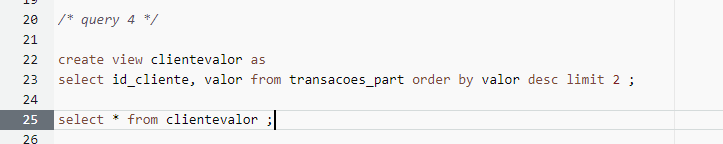

# 5. Bônus

Nessa atividade não há necessidade de entrega, no entanto, sugerimos que testem os seguintes comandos de visão:

```sql
describe clientevalor
```

```sql
show columns in clientevalor
```

```sql
show views
```
 
```sql
show create view clientevalor
```

```sql
drop view clientevalor 
```

describe clientevalor.

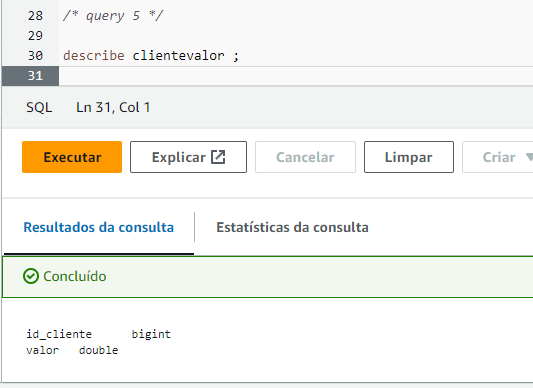


show columns in clientevalor ;

traz o mesmo resultado da query a cima.



show create view clientevalor;

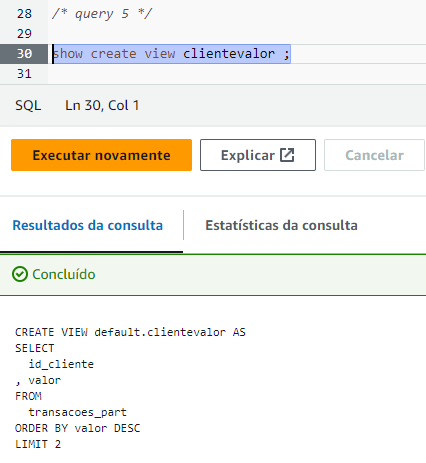



drop view cliente valor 

exclui a view clientevalor
